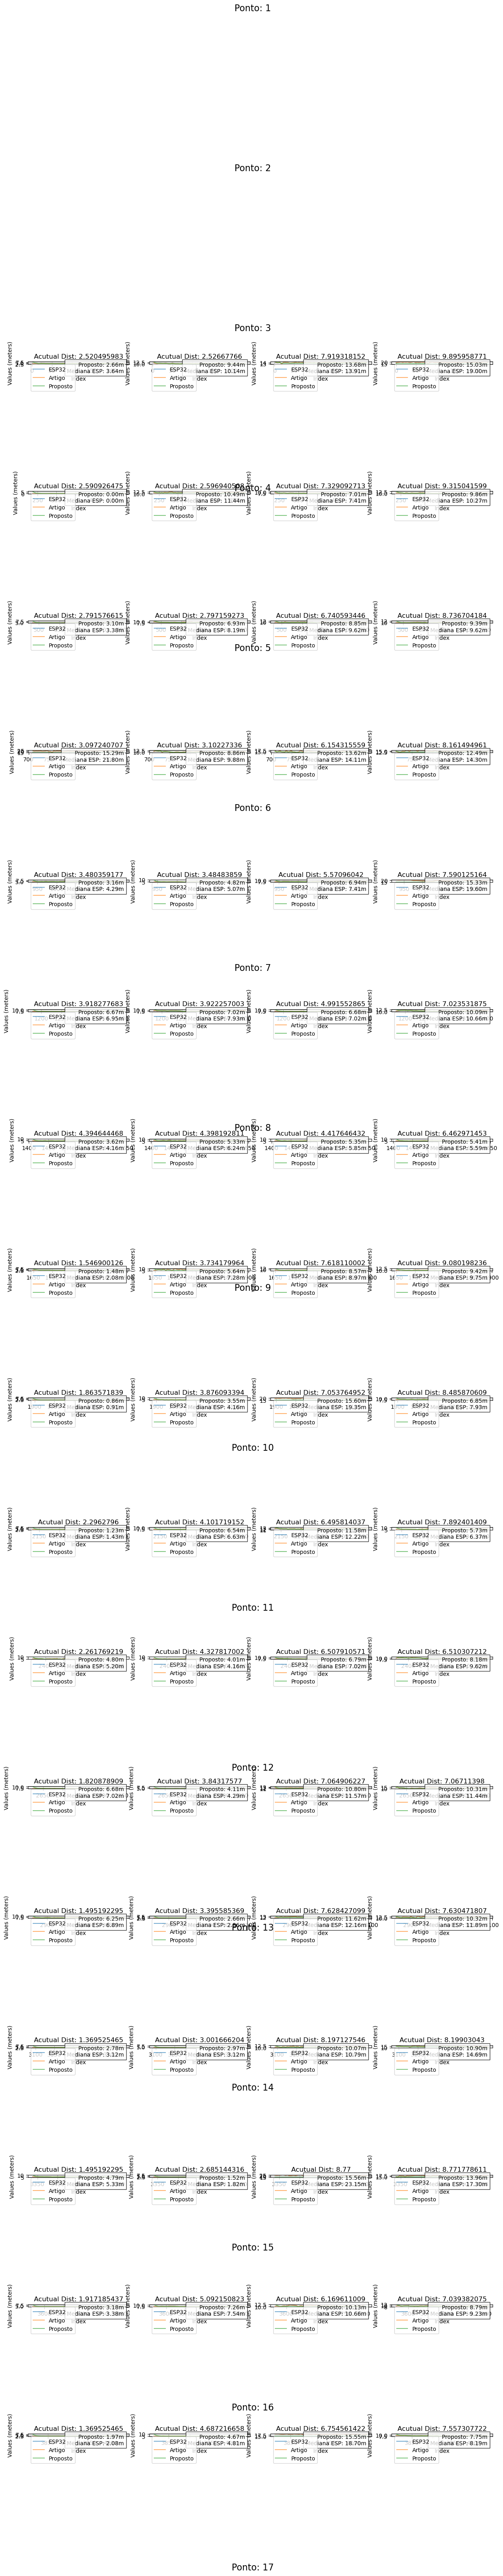

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math

rawnano2m = 0.299792458 / 2

csv_file = 'indoor-pt.csv'
data = pd.read_csv(csv_file)
#print (data.head())

pontos = data.groupby('Ponto')
#print(pontos.head())

n_cols = 4
n_rows = 20

fig = plt.figure(figsize=(15, 4*n_rows))
plt.subplots_adjust(hspace=50)

# Iterando sobre cada grupo de Ponto
for ponto, group_ponto in data.groupby('Ponto'):
    #print(f"\nPonto: {ponto}")
    
    position = ponto * n_cols
    y_position = 1 - (ponto / n_rows)

    fig.text(0.5, y_position, f'Ponto: {ponto}', ha='center', va='center', fontsize=16)

    # Iterando sobre cada valor único de actualDist dentro do grupo Ponto
    for actual_dist, group in group_ponto.groupby('actualDist'):
        #print(f"  actualDist: {actual_dist}")

        valor = 15.0
        for index, row in group.iterrows():
            dist = row['rttEst'] * rawnano2m
            if dist > valor:
                valor = valor + 0.01
            else:
                valor = valor - (valor - dist) * 0.5
            group.at[index, 'dist_calc'] = valor
            
        position = position + 1
        ax = fig.add_subplot(n_rows, n_cols, position)
        ax.plot(group.index, group['estDistEst'], label='ESP32', alpha=0.6)
        ax.plot(group.index, group['distEst'], label='Artigo', alpha=0.6)
        ax.plot(group.index, group['dist_calc'], label='Proposto', alpha=0.6)
        
        last_dist = group['dist_calc'].iloc[-1]

        text = f'Proposto: {last_dist:.2f}m\nMediana ESP: {group["distEst"].median():.2f}m'

        ax.text(0.95, 0.95, text, 
            transform=ax.transAxes,
            horizontalalignment='right',
            verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8))

        ax.legend(loc='upper left')

        ax.set_title(f'Acutual Dist: {actual_dist}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Values (meters)')
        ax.grid(True)
    
plt.tight_layout()
plt.show()